In [1]:
import matplotlib.pylab as plt
#from google.colab import files
#from IPython.display import Image
#uploaded = files.upload()


In [2]:
#plt.figure(figsize=(10,8))
#im = plt.imread("fig0.png")
#plt.imshow(im)
#plt.show()

In [3]:
import numpy as np
import scipy.integrate as integrate
import scipy.optimize as scp
import random
import scipy.interpolate as sci
import sympy as sp

\begin{equation}
\frac{d^{2}\theta}{dt^{2}}+b\frac{d\theta}{dt}+csin(\theta)=0
\end{equation}
Se parametriza la ecuación para obtener un sistema de dos ecuaciones diferenciales
\begin{equation}
w(t)=\frac{d\theta}{dt}
\end{equation}
\begin{equation}
\frac{dw}{dt}+bw+csin(\theta)=0 \Longleftrightarrow \frac{dw}{dt}=-bw-csin(\theta)
\end{equation}


In [4]:
## ejemplo de la documentación scipy.
## Sea y, el vector u(t) = [theta,omega]
## esta ecuación diferencial emplea dos constantes b,c, lo cual depende un tiempo t.

def derivative(y,t,b,c):
  theta,omega = y
  dydt = [omega,-b*omega-c*np.sin(theta)]
  return dydt



In [5]:
## condiciones iniciales
b,c = 0.25,5
## vector de condiciones iniciales
y0 = [np.pi-0.01,0]
## tiempo sobre el cual se define la ecuación diferencial
t = np.linspace(0,10,101)


In [6]:
sol = integrate.odeint(derivative,y0,t, args = (b,c))
sol,sol[:,0],sol[:,1]

(array([[ 3.13159265,  0.        ],
        [ 3.13134369, -0.00497917],
        [ 3.13059266, -0.01008232],
        [ 3.12931474, -0.0155594 ],
        [ 3.12745958, -0.02167272],
        [ 3.12494945, -0.02870966],
        [ 3.12167605, -0.03699626],
        [ 3.11749595, -0.04691241],
        [ 3.11222431, -0.05890921],
        [ 3.10562678, -0.07352962],
        [ 3.09740912, -0.09143266],
        [ 3.08720419, -0.11342292],
        [ 3.07455569, -0.14048582],
        [ 3.05889794, -0.17383052],
        [ 3.03953109, -0.21494105],
        [ 3.01559065, -0.26563728],
        [ 2.98601043, -0.32814569],
        [ 2.94947799, -0.40517888],
        [ 2.90438181, -0.50001893],
        [ 2.8487505 , -0.61659315],
        [ 2.7801856 , -0.75951753],
        [ 2.69579361, -0.93405995],
        [ 2.59212921, -1.14593418],
        [ 2.4651735 , -1.40077152],
        [ 2.31039098, -1.70302674],
        [ 2.12293776, -2.05398679],
        [ 1.89812785, -2.44856232],
        [ 1.63228274, -2.870

# [Atractor de lorentz](https://en.wikipedia.org/wiki/Lorenz_system)



Dada el siguiente sistema de ecuaciones, asociadas a un modelo simplificado de la atomosfera, encontrar los valores de x, y, z.

\begin{equation}
\frac{\mathrm{d}x}{\mathrm{d}t} = \sigma (y-x)
\end{equation}


\begin{equation}
\frac{\mathrm{d}y}{\mathrm{d}t} = x(\rho-z)-y
\end{equation}

\begin{equation}
\frac{\mathrm{d}z}{\mathrm{d}t} = xy-\beta z
\end{equation}

El modelo anterir permite describir de un a manera simplificada el movimiento atmosférico de masas de aire, los valores x, y, z se corresponden a posiciones de un volumen que contiene  una masa de aire, y los párametros $\sigma$, $\beta$ y  $\rho$ hacen referencia a, las siguientes cantidades fisicas:

\begin{equation}
\sigma = \frac{\mathrm{viscosidad}}{\mathrm{conductividad\ térmica }},
\end{equation}

$\rho$ hace refencia al término de convección entre el suelo y el techo del volumen discretizado.

\begin{equation}
\rho =\frac{g\beta}{v \alpha} (T_s-T_{\infty})L^3
\end{equation}

y $\beta=\frac{\mathrm{Ancho\ del\ cubo}}{\mathrm{Altura\ de\ la\ caja}}$ es un termino geométrico.


<!-- Tiene puntos de equilibrio en
- $(x, y, z)=(0,0,0)$
- $(\pm \sqrt{\beta(\rho-1}),\pm \sqrt{\beta(\rho-1}),\rho-1)$

El sistema de ecuaciones anterior puede ser escrito como:
\begin{equation}
\begin{pmatrix}
-\sigma & \sigma & 0\\
\rho-z & -1 & 0\\
y & 0 & -\beta
\end{pmatrix}
\end{equation} -->



Emplee la integración: [odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)para encontrar  el sistema de ecuaciones

2. Defina una función con el sistema de ecuaciones a integrar, para ello construya el siguiente el sistema de ecuaciones en una función:


\begin{equation}
\begin{bmatrix}
\frac{\mathrm{d}U_0}{\mathrm{d}t}\\
\frac{\mathrm{d}U_1}{\mathrm{d}t}\\
\frac{\mathrm{d}U_2}{\mathrm{d}t}
\end{bmatrix}=
\begin{bmatrix}
\sigma (U_1-U_0)\\
U_0(\rho-U_2)-U_1\\
U_0U_1-\beta U_2\\
\end{bmatrix}
\end{equation}


3. Solucione el sistema de ecuaciones para los siguientes parametros y  realice un gráfico en 3D de la solución, empleando el código de mas abajo.

- $\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 10$  con condiciones iniciales,  $x_0,y_0,z_0 = [1,1,1]$

- $\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 10$  con condiciones iniciales,  $x_0,y_0,z_0 = [1.5,1,5,1.5]$


- $\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 25$  con condiciones iniciales,  $x_0,y_0,z_0 = [1,1,1]$

- $\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 25$  con condiciones iniciales,  $x_0,y_0,z_0 = [1.001,1.001,1.001]$

```
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(x,y,z)
plt.draw()
plt.show()
```

5. ¿Como puede estar seguro de que la solución es la esperada?


In [7]:
## atractor de lorentz.

## y es el vector de y_ = [x,y,z]

def derivatives(y_,t,sigma,beta,rho):
  x,y,z = y_
  dydt = [sigma*(y-x),x*(rho-z)-y,x*y-beta*z]
  return dydt

def sol_(derivatives,y0,t,sigma,beta,rho):
  sol = integrate.odeint(derivatives,y0,t,args = (sigma,beta,rho))
  x,y,z = sol[:,0],sol[:,1],sol[:,2]
  return x,y,z

def grafica(x,y,z):
  fig = plt.figure()
  ax = fig.add_subplot(projection="3d")
  ax.plot(x,y,z)
  plt.draw()
  plt.title("Atractor de Lorentz")
  marker = 2
  plt.show()

def condiciones_iniciales(sigma,beta,rho,y0,t_):
  dic = {"sigma":sigma,"beta":beta,"rho":rho,"y0":y0,"t":t_}
  return dic




In [8]:
## condiciones iniciales

sigma,beta,rho = 10,8/3,10

## vector de condiciones iniciales

y_0 = [1,1,1]

t_ = np.linspace(0,40,1000)

In [9]:
sol2 = integrate.odeint(derivatives,y_0,t_,args = (sigma,beta,rho))
x,y,z = sol2[:,0],sol2[:,1],sol2[:,2]

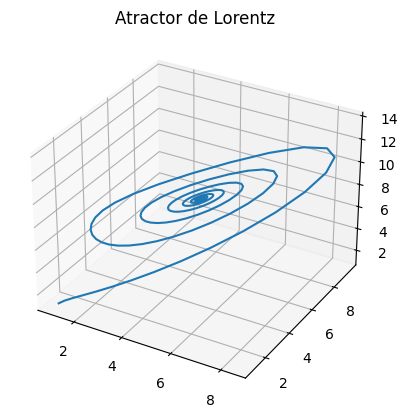

In [10]:
grafica(x,y,z)

In [11]:
## segunda grafica, con distintos paramos

## condiciones iniciales

sigma1,beta1,rho1 = 10,8./3,10

## vector de condiciones iniciales

y_1 = [1.5,1.5,1.5]

t_ = np.linspace(0,40,1000)

In [12]:
x1,y1,z1 = sol_(derivatives,y_1,t_,sigma1,beta1,rho1)

In [13]:
x1,y1,z1

(array([1.5       , 1.57926666, 1.78645699, 2.09654435, 2.50186312,
        3.00338586, 3.60449162, 4.30495605, 5.09365517, 5.93948208,
        6.78207763, 7.52764325, 8.05867086, 8.2642685 , 8.08415221,
        7.54121478, 6.73724234, 5.81278776, 4.89875284, 4.08618842,
        3.42063476, 2.91205701, 2.54920028, 2.31172447, 2.17809525,
        2.1296916 , 2.15234197, 2.23640448, 2.3761544 , 2.56890213,
        2.81401605, 3.11186424, 3.46259718, 3.86465409, 4.31289863,
        4.7964072 , 5.29619806, 5.78362611, 6.22066916, 6.5635311 ,
        6.77028389, 6.8113192 , 6.67892364, 6.39133014, 5.98872302,
        5.52287146, 5.04514752, 4.59751469, 4.20850432, 3.89356424,
        3.65790896, 3.50006997, 3.41501378, 3.39636748, 3.43772457,
        3.53319714, 3.67741987, 3.8651802 , 4.09080471, 4.34740582,
        4.62609953, 4.91534671, 5.20063513, 5.46477154, 5.68903222,
        5.85526169, 5.94868535, 5.96080243, 5.89146414, 5.74934564,
        5.55053892, 5.3156878 , 5.06657924, 4.82

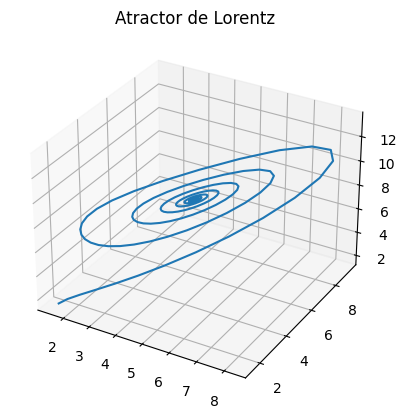

In [14]:
grafica(x1,y1,z1)

In [15]:
## tercera grafica, con distintos paramos

## condiciones iniciales

sigma2,beta2,rho2 = 10,8./3,25

## vector de condiciones iniciales

y_1 = [1,1,1]

t_1 = np.linspace(0,40,1000)

In [16]:
x2,y2,z2 = sol_(derivatives,y_1,t_1,sigma2,beta2,rho2)


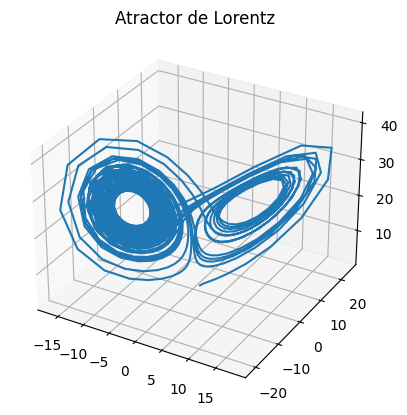

In [17]:
grafica(x2,y2,z2)

In [18]:
## cuarta grafica con distintos parametros

dic = condiciones_iniciales(10,8./3,25,[1.001,1.001,1.001],t_)



In [19]:
x3,y3,z3 = sol_(derivatives,dic["y0"],dic["t"],dic["sigma"],dic["beta"],dic["rho"])

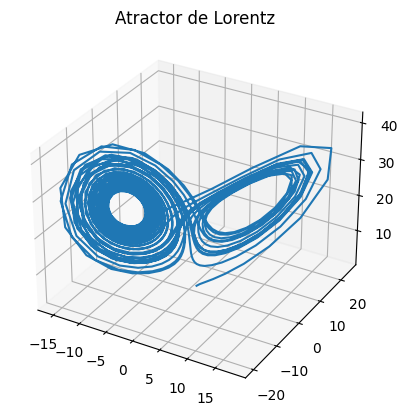

In [20]:
grafica(x3,y3,z3)

In [21]:
dic1 = condiciones_iniciales(100,0,25,[1.001,1.001,1.001],t_)
x4,y4,z4 = sol_(derivatives,dic1["y0"],dic1["t"],dic1["sigma"],dic1["beta"],dic1["rho"])

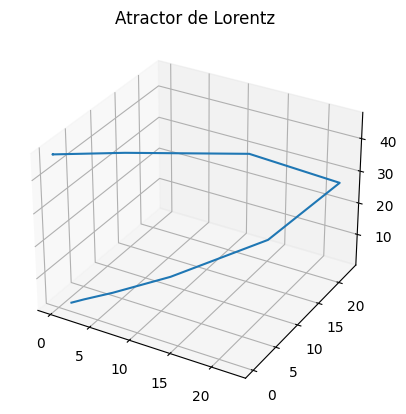

In [22]:
grafica(x4,y4,z4)

# Taller de metodos computacionales

# Proyectiles con rozamiento y viento


Un proyectil es lanzado desde una posición (xo, yo), en presencia de viento y fuerza de fricción. Suponer que el efecto del viento sobre el proyectil es
el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Si $\vec{u} $ es la velocidad del viento y $\alpha$ el ángulo que hace direccion de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones de movimiento:

\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_y-u\sin \alpha )
\end{equation}


Para un proyectil lanzado con una rapidez $v_0$  y un ángulo $\theta_0$,
se enecuentra que la solución a la ecuación diferencial viene dada por:


Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html

Problema.

1. Escribir un programa en python que resuelva la ecuacion diferencial del movimiento del proeyctil y comprobar la solución con la solución teórica. Para ello realice una grafica de la trayectoria y comprueba que la soución numérica coincide con la solucion teórica. Compruebe su solución para $b=0.05$, $theta=60^{o}$, $u=v_0/2$, $\alpha=\pi$, $vo=50m/s$


3. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numericamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

4. Construya una  gráfica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 80 grados

5. Realice un ajuste a la curva construida en el apartado anterior.

6. Se denomina ángulo crítico, aquel  ángulo para el cual el alcance máximo es cero.  Para ello, se pide resolver el sistema no lineal de ecuaciones para $t$ y $\theta$  con  $x=0$, $y=0$. Representar para $\theta=0.9\theta_c$, $\theta=\theta_c$, $\theta=1.1\theta_c$.

7. Construya la trayectoria seguida por la partícula para $\theta=10^{o}, 15^{o}, 20^{o}, ...45^{o}$.

8. Determine el máximo de cada unas de las trayectorias anteriores, y construya una gráfica de los máximos como función del ángulo.

## Ecuaciones diferenciales a resolver.
\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_y-u\sin \alpha )
\end{equation}


\begin{equation}
m\frac{d^{2}x}{dt^{2}}=-mb(\frac{dx}{dt}-ucos(\alpha))
\end{equation}


\begin{equation}
m\frac{d^{2}y}{dt^{2}} = -mg-mb(\frac{dy}{dt}-u\sin \alpha )
\end{equation}

La solución será dada con la libreria scipy.integrate.odeint. Pero, primero debemos parametrizar las ecuaciones para la posición en x, y la posición en y.

## Parametrización para  $x(t)$

Sea $u_{1}(t)=x(t)$ y $u_{2}(t) = x'(t)$. Si derivamos cada variable tendriamos que:

$u_{1}'(t) = x'(t)⟺u_{1}'(t) = u_{2}(t)$ y
$u_{2}'(t) = x''(t)⟺ u_{2}'(t) =-b(x'(t)-ucos(\alpha))$ $⟺ u_{2}'(t)=-b(u_{2}(t)-ucos(\alpha))$.

 Ahora bien, si se define las funciones $\vec{u(t)} : ℝ ⟹ ℝ^{2}$ y $\vec{F(t)}: ℝ\times ℝ^{2} ⟹ ℝ^{2}$, como:


\begin{equation}
\vec{u(t)} = (u_{1}(t),u_{2}(t))
\end{equation}


\begin{equation}
\vec{F(t,\vec{u(t)})} = (f_{1}(t,\vec{u(t)}),f_{2}(t,\vec{u(t)}))
\end{equation}

donde $f_{1}(t,\vec{u(t)})=u_{2}(t)$ y $f_{2}(t,\vec{u(t)})=-b(u_{2}(t)-ucos(\alpha))$. Podemos reescribir aquella ecuación diferencial de orden superior como $\vec{u'(t)}=\vec{F(t,\vec{u(t)})}$, es decir:



\begin{equation}
\begin{bmatrix}
\frac{\mathrm{d}u_1}{\mathrm{d}t}\\
\frac{\mathrm{d}u_2}{\mathrm{d}t}\\
\end{bmatrix}=
\begin{bmatrix}
\ u_{2}(t)\\
-b(u_{2}(t)-ucos(\alpha))\\
\end{bmatrix}
\end{equation}

Si repetimos un procedimiento analogo para $y(t)$ podemos hallar la posición en el eje y

## Parametrización para $y(t)$


Sea $u_{1}(t)=y(t)$ y $u_{2}(t) = y'(t)$. Si derivamos cada variable tendriamos que:

$u_{1}'(t) = y'(t)⟺u_{1}'(t) = u_{2}(t)$ y
$u_{2}'(t) = y''(t)⟺ u_{2}'(t) =-g-b(y'(t)-usin(\alpha))$ $⟺ u_{2}'(t)=-g-b(u_{2}(t)-usin(\alpha))$.

 Ahora bien, si se define las funciones $\vec{u(t)} : ℝ ⟹ ℝ^{2}$ y $\vec{F(t)}: ℝ\times ℝ^{2} ⟹ ℝ^{2}$, como:


\begin{equation}
\vec{u(t)} = (u_{1}(t),u_{2}(t))
\end{equation}


\begin{equation}
\vec{F(t,\vec{u(t)})} = (f_{1}(t,\vec{u(t)}),f_{2}(t,\vec{u(t)}))
\end{equation}

donde $f_{1}(t,\vec{u(t)})=u_{2}(t)$ y $f_{2}(t,\vec{u(t)})=-g-b(u_{2}(t)-usin(\alpha))$. Podemos reescribir aquella ecuación diferencial de orden superior como $\vec{u'(t)}=\vec{F(t,\vec{u(t)})}$, es decir:



\begin{equation}
\begin{bmatrix}
\frac{\mathrm{d}u_1}{\mathrm{d}t}\\
\frac{\mathrm{d}u_2}{\mathrm{d}t}\\
\end{bmatrix}=
\begin{bmatrix}
\ u_{2}(t)\\
-g-b(u_{2}(t)-usin(\alpha))\\
\end{bmatrix}
\end{equation}




In [23]:
## condiciones iniciales

b = 0.05
theta = 60
theta = np.deg2rad(60)
theta = float(theta)
v0 = 50
u = v0/2
alpha = np.pi
m = 2
params = (u,alpha,theta,b,v0)
params_2 = (b,u,alpha,v0)
vx0 = np.cos(theta)*v0
vy0 = np.sin(theta)*v0
## condiciones asociadas al PVI

## se supone que el proyectil parte del origen (0,0)
x0_ = [0,vx0]
y0_ = [0,vy0]
t_2 = np.linspace(0,10,1000)
colors = ["red","blue","black","green","orange"]

In [24]:
## y es el vector que contiene u1 y u2. y = [u1,u2]
def funct(y,t,b,u,alpha):
  g = 9.8 ## m/s^{2}
  u1,u2 = y
  dydt = [u2,-b*(u2-u*np.cos(alpha))]
  return dydt

def funct2(y,t,b,u,alpha):
  g = 9.8
  u1,u2 = y
  dydt = [u2,-g-b*(u2-u*np.sin(alpha))]
  return dydt


In [25]:
## aquí tenemos la posición x en función del tiempo-

solutionx = integrate.odeint(funct,x0_,t_2,args = (b,u,alpha))

posx = solutionx[:,0]
vx_ = solutionx[:,1]

In [26]:
## aquí tenemos la posición y en función del tiempo
solutiony = integrate.odeint(funct2,y0_,t_2,args = (b,u,alpha))

posy = solutiony[:,0]
vy_ = solutiony[:,1]

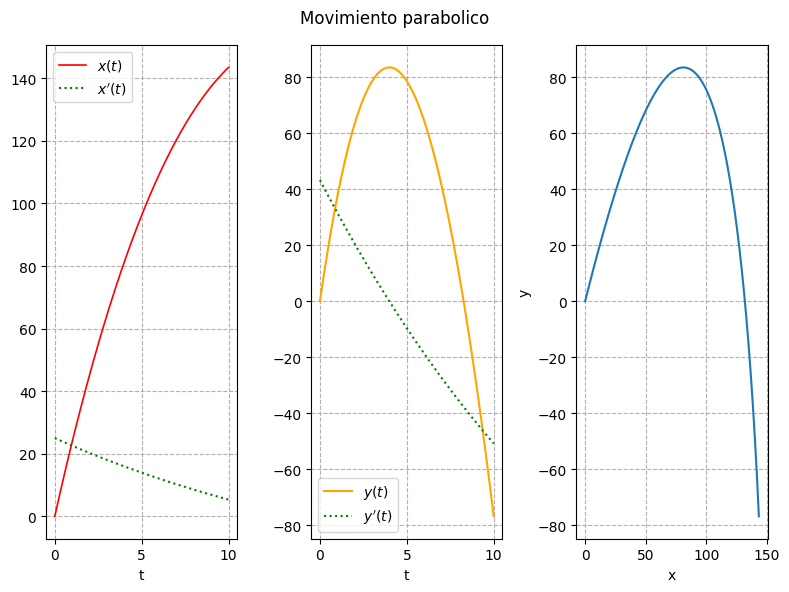

In [27]:
fig, ax = plt.subplots(1,3,figsize = (8,6))
ax[0].plot(t_2,posx, color = "red", linewidth = 1.2, label = r"$x(t)$")
ax[0].plot(t_2,vx_, color = "green", ls = "dotted", label = r"$x'(t)$", linewidth = 1.5)
ax[0].legend()
ax[0].grid(True, ls = "dashed")
ax[0].set_xlabel("t")
ax[1].plot(t_2,posy, color = "orange", label = r"$y(t)$")
ax[1].grid(True, ls = "dashed")
ax[1].set_xlabel("t")
ax[1].plot(t_2,vy_,color = "green", ls = "dotted", label = r"$y'(t)$")
ax[1].legend()
ax[2].plot(posx,posy)
ax[2].grid(True, ls = "dashed")
ax[2].set_ylabel("y")
ax[2].set_xlabel("x")
fig.suptitle("Movimiento parabolico")
plt.tight_layout()

Como se puede observar estamos graficando puntos que no van acorde a la solución, pues el objeto no pasa del suelo. Para solucionar ello se emplea la solución teorica para hallar el cero de la función y hallar el tiempo de vuelo.Además que sirve para comprobar la anterior solución  numerica.


Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

In [28]:
def posx_(t,u,alpha,theta,b,v0):
  T1 = u*np.cos(alpha)*t
  T2 = (1/b)*(v0*np.cos(theta)-u*np.cos(alpha))
  T3 = 1-np.exp(-b*t)
  val = T1 + T2*T3
  return val

def posy_(t,u,alpha,theta,b,v0):
  g = 9.8
  T1 = (1/b)*(g/b + v0*np.sin(theta)-u*np.sin(alpha))
  T2 = 1-np.exp(-b*t)
  T3 = t*(g/b - u * np.sin(alpha))
  val = T1*T2-T3
  return val

In [29]:
tmax = scp.bisect(posy_,5,10, args = (u,alpha,theta,b,v0))


In [30]:
## nueva discretización del intervalo

t_new = np.linspace(0,tmax,1000)

solutionx = integrate.odeint(funct,x0_,t_new,args = (b,u,alpha))

posx_2 = solutionx[:,0]
vx_2 = solutionx[:,1]

solutiony = integrate.odeint(funct2,y0_,t_new,args = (b,u,alpha))

posy_2 = solutiony[:,0]
vy_2 = solutiony[:,1]

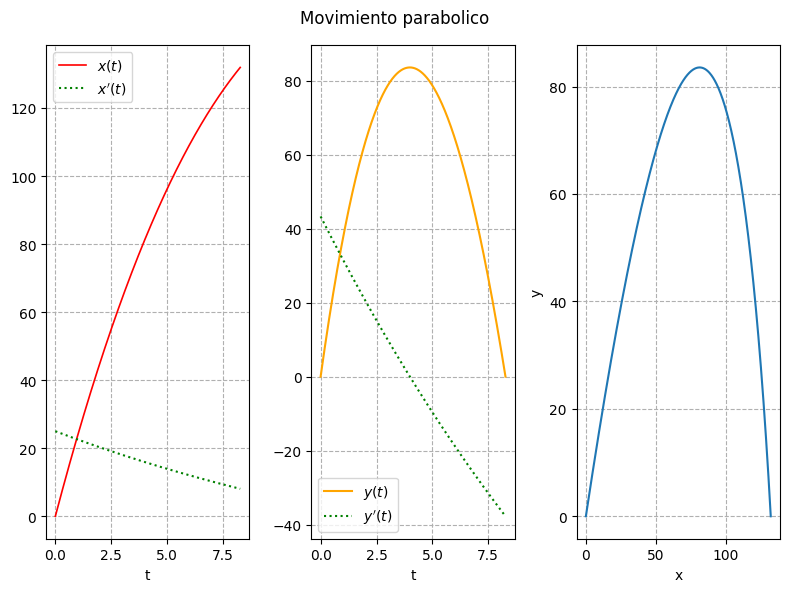

In [31]:
fig, ax = plt.subplots(1,3,figsize = (8,6))
ax[0].plot(t_new,posx_2, color = "red", linewidth = 1.2, label = r"$x(t)$")
ax[0].plot(t_new,vx_2, color = "green", ls = "dotted", label = r"$x'(t)$", linewidth = 1.5)
ax[0].legend()
ax[0].grid(True, ls = "dashed")
ax[0].set_xlabel("t")
ax[1].plot(t_new,posy_2, color = "orange", label = r"$y(t)$")
ax[1].grid(True, ls = "dashed")
ax[1].set_xlabel("t")
ax[1].plot(t_new,vy_2,color = "green", ls = "dotted", label = r"$y'(t)$")
ax[1].legend()
ax[2].plot(posx_2,posy_2)
ax[2].grid(True, ls = "dashed")
ax[2].set_ylabel("y")
ax[2].set_xlabel("x")
fig.suptitle("Movimiento parabolico")
plt.tight_layout()

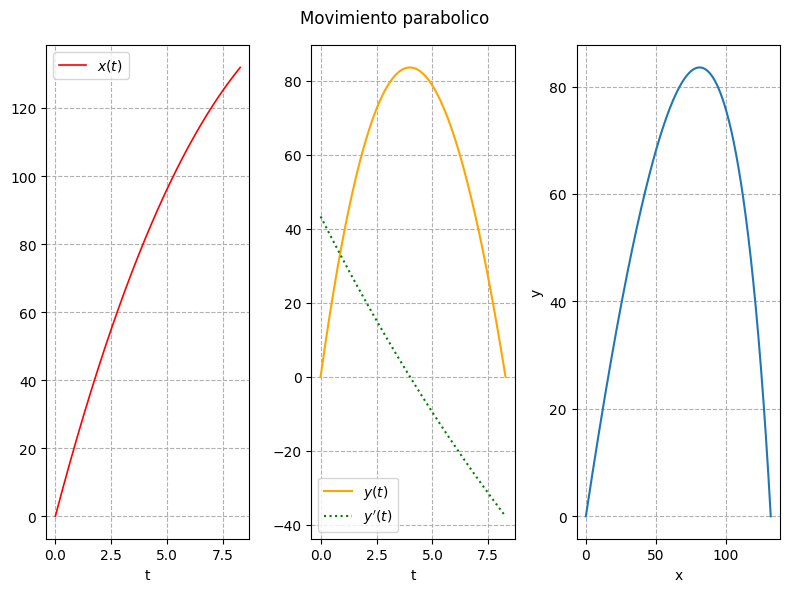

In [32]:
## aquí se graficará la solución analitica.
fig, ax = plt.subplots(1,3,figsize = (8,6))
ax[0].plot(t_new,posx_(t_new,*params), color = "red", linewidth = 1.2, label = r"$x(t)$")
ax[0].legend()
ax[0].grid(True, ls = "dashed")
ax[0].set_xlabel("t")
ax[1].plot(t_new,posy_(t_new,*params), color = "orange", label = r"$y(t)$")
ax[1].grid(True, ls = "dashed")
ax[1].set_xlabel("t")
ax[1].plot(t_new,vy_2,color = "green", ls = "dotted", label = r"$y'(t)$")
ax[1].legend()
ax[2].plot(posx_(t_new,*params),posy_(t_new,*params))
ax[2].grid(True, ls = "dashed")
ax[2].set_ylabel("y")
ax[2].set_xlabel("x")
fig.suptitle("Movimiento parabolico")
plt.tight_layout()


In [33]:
## error entre la aproximación númerica y la teorica.

error_x = np.zeros(len(t_new))
error_y = np.zeros(len(t_new))
for i in range(len(t_new)):
  error_x[i] = abs(posx_2[i]-posx_(t_new[i],*params))
  error_y[i] = abs(posy_2[i]-posy_(t_new[i],*params))


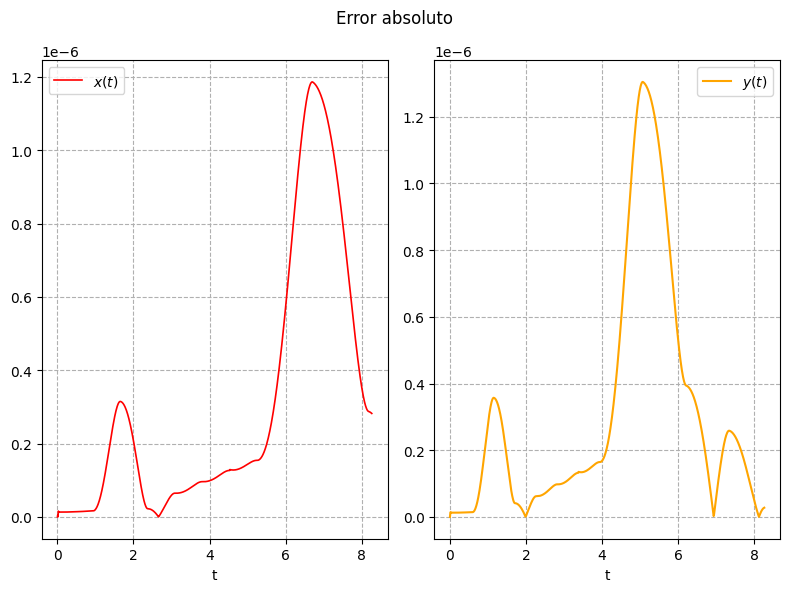

In [34]:
## aquí se graficará el error entre la solución númerica y la analitica.
fig, ax = plt.subplots(1,2,figsize = (8,6))
ax[0].plot(t_new,error_x, color = "red", linewidth = 1.2, label = r"$x(t)$")
ax[0].legend()
ax[0].grid(True, ls = "dashed")
ax[0].set_xlabel("t")
ax[1].plot(t_new,error_y, color = "orange", label = r"$y(t)$")
ax[1].grid(True, ls = "dashed")
ax[1].set_xlabel("t")
ax[1].legend()
fig.suptitle("Error absoluto")
plt.tight_layout()

3. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numericamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  



In [35]:
## aquí vamos a calcular los alcance máximos, variando el ángulo theta.
def t_vuelo(posy,u,alpha,theta,b,v0):
  a = 1e-5
  params = (u,alpha,theta,b,v0)
  ## cero de la función posy_
  tmax = scp.newton(posy,1.3, args = params)
  return tmax


## respectivamente el alcance máximo.

def x_max(t_max1,params):
  val = posx_(t_max1,*params)
  return val

def t_vuelo2(posy,u,alpha,theta,b,v0):
  a = 1e-5
  params = (u,alpha,theta,b,v0)
## el codigo toma para máximo 1000 segundos.
  t = np.linspace(0,1000,1000000)
  b = 0
  for i in range(len(t)):
    if posy(t[i],*params) >0:
      b +=1
    elif posy(t[i],*params) <0:
      break
  tmax = scp.bisect(posy,a,b, args = params)
  return tmax


In [36]:
## mismas condiciones iniciales solo cambia el angulo, que será el angulo theta1.

theta1 = 45
theta1 = np.deg2rad(theta)
params2 = (u,alpha,theta1,b,v0)

tiempo_vuelo = t_vuelo(posy_,*params2)
alcance_maximo = x_max(tiempo_vuelo,params2)

4. Construya una  gráfica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 80 grados

In [37]:
## angulos en grados, con paso de 2.
thetas_deg = np.arange(10,82,2)
thetas_rad = np.deg2rad(thetas_deg)
# vector de alcance máximos.
R = np.zeros(len(thetas_rad))

In [38]:
for i in range(len(R)):
  params_va = (u,alpha,thetas_rad[i],b,v0)
  t_V = t_vuelo2(posy_,*params_va)
  R[i] = x_max(t_V,params_va)

Text(0.5, 1.0, 'Alcance máximo vs theta')

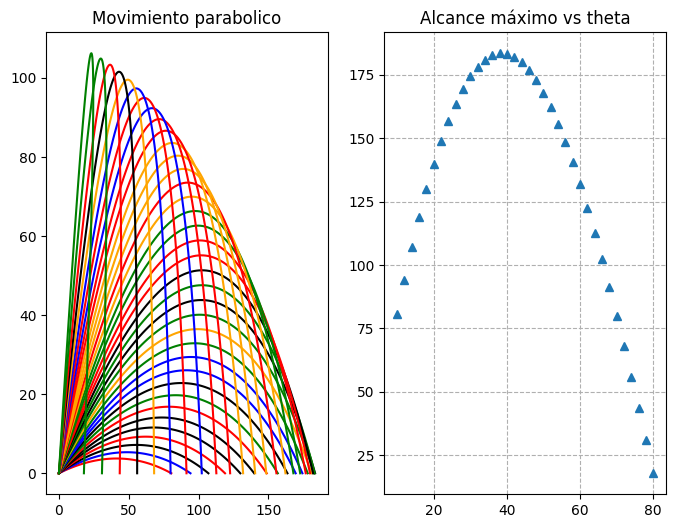

In [39]:
fig, axs = plt.subplots(1,2, figsize = (8,6))
axs[1].plot(thetas_deg,R,"^")
axs[1].grid(True, ls = "dashed")
for i in range(len(R)):
  params_va = (u,alpha,thetas_rad[i],b,v0)
  t_V = t_vuelo2(posy_,*params_va)
  t_T = np.linspace(0,t_V,100)
  axs[0].plot( posx_(t_T,*params_va),posy_(t_T,*params_va), color = random.choice(colors) )
axs[0].set_title("Movimiento parabolico")
axs[1].set_title("Alcance máximo vs theta")


5. Realice un ajuste a la curva construida en el apartado anterior.

In [40]:
poly = sci.CubicSpline(thetas_deg,R)
angulos = np.arange(0,80.1,0.1)


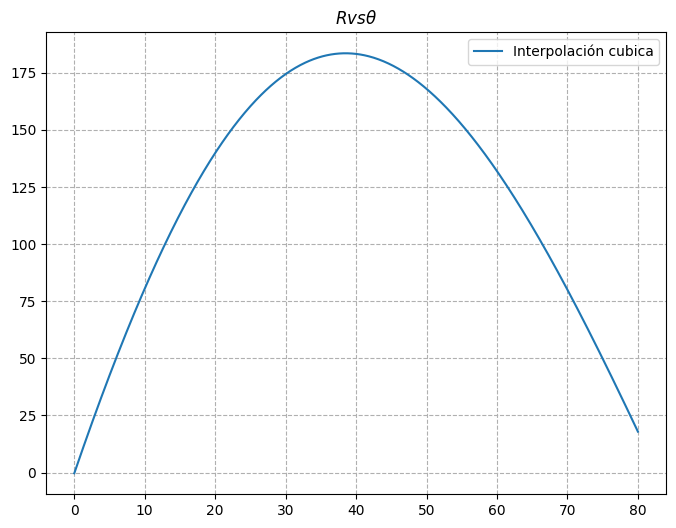

In [41]:
plt.figure(figsize = (8,6))

plt.plot(angulos,poly(angulos), label = "Interpolación cubica")
plt.grid(True, ls = "dashed")
plt.legend()
plt.title(r"$Rvs\theta$")
plt.show()

6. Se denomina ángulo crítico, aquel  ángulo para el cual el alcance máximo es cero.  Para ello, se pide resolver el sistema no lineal de ecuaciones para $t$ y $\theta$  con  $x=0$, $y=0$. Representar para $\theta=0.9\theta_c$, $\theta=\theta_c$, $\theta=1.1\theta_c$.


Posición en x
\begin{equation}
 0 =(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y
\begin{equation}
0 = \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Introducimos la función $\vec{F(t)} : ℝ^{2} → ℝ^{2} $ como $\vec{F(\vec{t})} = (f_{1}(\vec{t}),f_{2}(\vec{t}))$, donde $f_{1}(\vec{t}) = (u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))$ y $f_{2}(\vec{t}) = \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t $
Así con el método Newton Raphson tenemos:

\begin{equation}
\vec{t_{k+1}}=\vec{t_{k}}-(\frac{\partial\vec{F(t_{k})} }{\partial x})^{-1}+ \vec{F(t_{k})}
\end{equation}

Donde:

$\frac{\partial\vec{F(t_{k})} }{\partial x}=$
\begin{bmatrix}
 \frac{\partial f_{1}}{\partial x}& \frac{\partial f_{1}}{\partial y}\\
 \frac{\partial f_{2}}{\partial x}& \frac{\partial f_{2}}{\partial y}
\end{bmatrix}

Y $\vec{t_{k}} = (t,\theta)$




In [42]:


def sistem(vars,b,u,alpha,v0):
  t,theta = vars
  T1 = u*np.cos(alpha)*t
  T2 = (1/b)*(v0*np.cos(theta)-u*np.cos(alpha))
  T3 = 1-np.exp(-b*t)
  eq1 = T1 + T2*T3
  g = 9.8
  T1_ = (1/b)*(g/b + v0*np.sin(theta)-u*np.sin(alpha))
  T2_ = 1-np.exp(-b*t)
  T3_ = t*(g/b - u * np.sin(alpha))
  eq2 = T1_*T2_-T3_

  return [eq1,eq2]

point = [1,np.radians(45)]

sol = scp.fsolve(sistem,point, args = (b,u,alpha,v0))

def sistem2(t,b,u,alpha,v0,theta):
  T1 = u*np.cos(alpha)*t[0]
  T2 = (1/b)*(v0*np.cos(theta)-u*np.cos(alpha))
  T3 = 1-np.exp(-b*t[0])
  eq1 = T1 + T2*T3
  g = 9.8
  T1_ = (1/b)*(g/b + v0*np.sin(theta)-u*np.sin(alpha))
  T2_ = 1-np.exp(-b*t[0])
  T3_ = t[0]*(g/b - u * np.sin(alpha))
  eq2 = T1_*T2_-T3_
  return [eq1,eq2]


sol2 = scp.fsolve(sistem2,point, args = (b,u,alpha,v0,sol[1]*0.9))

sol3 = scp.fsolve(sistem2,point, args = (b,u,alpha,v0,sol[1]*1.1))


In [43]:
params_2 = (u,alpha,sol[1],b,v0)
sol,sol2,sol3

(array([-1.45934733e-15,  7.18593309e-01]),
 array([ 1.22988186e-21, -3.45025682e+03]),
 array([ 7.89376184e-19, -3.25414557e+03]))

In [44]:

posx_(sol3[0],*params_2),posy_(sol3[0],*params_2)

(-1.9734404595316745e-17, -1.5471773202728328e-16)

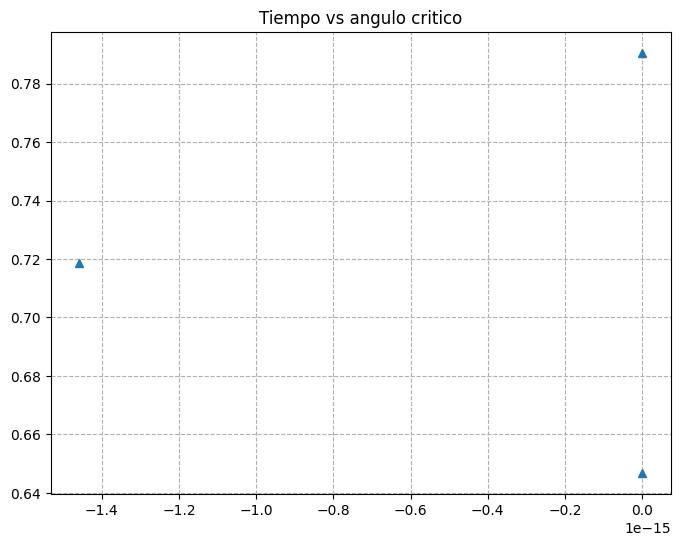

In [47]:
plt.figure(figsize = (8,6))
plt.title("Tiempo vs angulo critico")
plt.plot([sol[0],sol2[0],sol3[0]],[sol[1],sol[1]*0.9,sol[1]*1.1], "^")
plt.grid(True, ls = "dashed")

7. Construya la trayectoria seguida por la partícula para $\theta=10^{o}, 15^{o}, 20^{o}, ...45^{o}$.

8. Determine el máximo de cada unas de las trayectorias anteriores, y construya una gráfica de los máximos como función del ángulo.

In [61]:
## angulos en grados, con paso de 2.
thetas_deg1 = np.arange(10,50,5)
thetas_rad1 = np.deg2rad(thetas_deg1)
# vector de alcance máximos.
R1 = np.zeros(len(thetas_rad1))


In [66]:
for i in range(len(R1)):
  params_va_ = (u,alpha,thetas_rad1[i],b,v0)
  t_V = t_vuelo2(posy_,*params_va_)
  R1[i] = x_max(t_V,params_va_)
R1

array([ 80.49846714, 113.12515886, 139.86199269, 160.34452064,
       174.38788563, 181.97252546, 183.22859152, 178.41981845])

Text(0.5, 1.0, 'Alcance máximo vs theta')

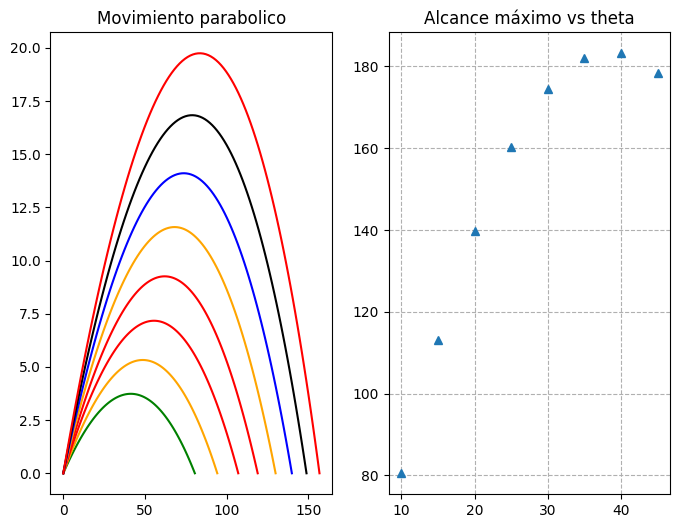

In [67]:
fig, ax = plt.subplots(1,2, figsize = (8,6))
ax[1].plot(thetas_deg1,R1,"^")
ax[1].grid(True, ls = "dashed")
for i in range(len(R1)):
  params_va_ = (u,alpha,thetas_rad[i],b,v0)
  t_V_ = t_vuelo2(posy_,*params_va_)
  t_T_ = np.linspace(0,t_V_,100)
  ax[0].plot( posx_(t_T_,*params_va_),posy_(t_T_,*params_va_), color = random.choice(colors) )
ax[0].set_title("Movimiento parabolico")
ax[1].set_title("Alcance máximo vs theta")

In [68]:
 # # alcancé máximo

 R1


array([ 80.49846714, 113.12515886, 139.86199269, 160.34452064,
       174.38788563, 181.97252546, 183.22859152, 178.41981845])